# Symbolic neural networks for cognitive capacities
[Paper](http://reason.cs.uiuc.edu/tsvi/BICA_93_Main.pdf)

In [1]:
%run achler_functions.py

Wolfram's [Rule 30](https://www.wolframalpha.com/input/?i=rule+30) defines a boolean vector transformation which produces randomness -- creatively?

In [2]:
import numpy as np
exp = np.zeros((9, 17))
print(exp)
print(exp.shape)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
(9, 17)


In [3]:
from collections import OrderedDict
init = OrderedDict({"col-8": 0})
init["col-7"] = 0
init["col-6"] = 0
init["col-5"] = 0
init["col-4"] = 0
init["col-3"] = 0
init["col-2"] = 0
init["col-1"] = 0
init["col0"] = 1
init["col1"] = 0
init["col2"] = 0
init["col3"] = 0
init["col4"] = 0
init["col5"] = 0
init["col6"] = 0
init["col7"] = 0
init["col8"] = 0
exp_labels = []
exp, exp_labels = learn_instance([init,], exp, exp_labels)
print(exp)
print(exp_labels)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
['col-8', 'col-7', 'col-6', 'col-5', 'col-4', 'col-3', 'col-2', 'col-1', 'col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']


In [4]:
def rule_30(instance):
    # (p + q + r + q r) mod 2
    keys = list(instance.keys())
    transformed_instance = OrderedDict({})
    for offset in range(len(keys)):
        p = 0
        q = instance[keys[offset]]
        r = 0
        if offset > 0:
            p = instance[keys[offset - 1]]
        if offset < len(keys) - 1:
            r = instance[keys[offset + 1]]
        transformed_instance[keys[offset]] = (p + q + r + q * r) % 2
    return transformed_instance
transformed_instance = rule_30(init)
transformed_instance

OrderedDict([('col-8', 0),
             ('col-7', 0),
             ('col-6', 0),
             ('col-5', 0),
             ('col-4', 0),
             ('col-3', 0),
             ('col-2', 0),
             ('col-1', 1),
             ('col0', 1),
             ('col1', 1),
             ('col2', 0),
             ('col3', 0),
             ('col4', 0),
             ('col5', 0),
             ('col6', 0),
             ('col7', 0),
             ('col8', 0)])

In [5]:
exp, exp_labels = learn_instance([transformed_instance,], exp, exp_labels)
exp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

In [6]:
transformed_instance = rule_30(transformed_instance)
exp, exp_labels = learn_instance([transformed_instance,], exp, exp_labels)
exp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

In [7]:
for i in range(6):
    transformed_instance = rule_30(transformed_instance)
    exp, exp_labels = learn_instance([transformed_instance,], exp, exp_labels)
exp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]])

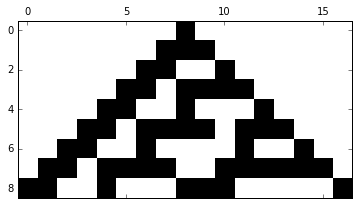

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
mat = ax.matshow(exp)
plt.imshow(exp, cmap='Greys',  interpolation='nearest')
plt.show()

In [9]:
pinv = np.linalg.pinv(exp)
pinv_transpose = pinv.transpose()
print(pinv_transpose)

[[ -1.09471095e-01   1.89421894e-01  -1.29151292e-02  -1.29766298e-01
   -3.08118081e-01  -4.93234932e-01   9.90159902e-02  -2.18327183e-01
    1.00000000e+00  -7.81672817e-01   1.19311193e-01   5.65805658e-02
   -1.98646986e-01   4.80934809e-01  -1.29151292e-02   2.98892989e-01
   -1.09471095e-01]
 [ -4.79704797e-02  -4.05904059e-02   2.52767528e-01  -7.93357934e-02
   -1.12546125e-01   1.77121771e-01  -2.71217712e-01   5.11070111e-01
    5.55111512e-16   4.88929889e-01  -2.39852399e-01  -1.54981550e-01
   -6.45756458e-02  -3.17343173e-01   2.52767528e-01   7.38007380e-03
   -4.79704797e-02]
 [  3.25953260e-02  -1.51906519e-01  -6.91881919e-02   6.67281673e-02
    6.36531365e-02  -9.47109471e-02   3.63776138e-01   3.06580566e-01
    2.87964097e-16  -3.06580566e-01   3.29643296e-01  -2.92127921e-01
    3.10578106e-02  -2.33087331e-01  -6.91881919e-02  -1.84501845e-01
    3.25953260e-02]
 [ -7.19557196e-02  -6.08856089e-02  -1.20848708e-01  -1.19003690e-01
   -1.68819188e-01   2.6568265

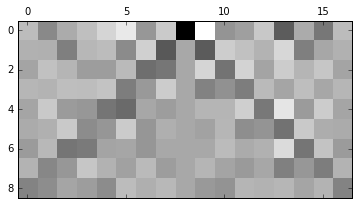

In [10]:
fig, ax = plt.subplots()
mat = ax.matshow(pinv_transpose)
plt.imshow(pinv_transpose, cmap='Greys',  interpolation='nearest')
plt.show()

In [11]:
for index in range(exp.shape[0]):
    prediction = pinv_transpose * np.matrix(exp[index, :]).T
    print(index + 1, round(prediction.item( (index, 0)), 2))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0


In [12]:
def make_rule_30_category(exp):
    rule_30 = np.matrix(np.zeros(exp.shape[1]))
    for index in range(exp.shape[0]):
        if exp[index].any():
            rule_30 += exp[index, :]
    return rule_30
rule_30 = make_rule_30_category(exp)
print("rule_30  ", rule_30)

rule_30   [[ 1.  2.  2.  2.  4.  3.  5.  4.  6.  4.  4.  4.  3.  2.  2.  1.  1.]]


In [13]:
prediction_rule_30 = pinv_transpose * rule_30.T
prediction_rule_30.round(2)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])